In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data=pd.read_csv("50_Startups.csv")

In [11]:
x=data[['R&D Spend','Administration','Marketing Spend','State']]
y=data[['Profit']]

In [123]:
x=pd.get_dummies(data=x,drop_first=True)
x.head()

,RnD,Administration,Marketing,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [124]:
frames=[x,y]
df=pd.concat(frames,axis=1)

In [125]:
df

,RnD,Administration,Marketing,State_Florida,State_New York,Profit
0,165349.20,136897.80,471784.10,0,1,192261.83
1,162597.70,151377.59,443898.53,0,0,191792.06
2,153441.51,101145.55,407934.54,1,0,191050.39
3,144372.41,118671.85,383199.62,0,1,182901.99
4,142107.34,91391.77,366168.42,1,0,166187.94
5,131876.90,99814.71,362861.36,0,1,156991.12
6,134615.46,147198.87,127716.82,0,0,156122.51
7,130298.13,145530.06,323876.68,1,0,155752.60
8,120542.52,148718.95,311613.29,0,1,152211.77
9,123334.88,108679.17,304981.62,0,0,149759.96


In [126]:
y=data[['Profit']]
x=(df[['RnD','Administration','Marketing','State_Florida','State_New York']])

In [127]:
import statsmodels.api as sm
x_sm=sm.add_constant(x)
model=sm.OLS(y,x_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           1.34e-27
Time:                        22:36:04   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
RnD                0.8060      0.046     17.369      0.000       0.712       0.900
Administration    -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing          0.0270      0.017      1.574      0.123      -0.008       0.062
State_Florida    198.7888   3371.007      0.059      0.953   -6595.030    6992.607
State_New York   -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

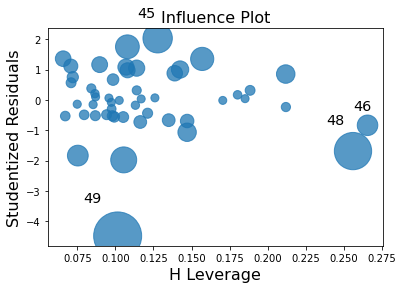

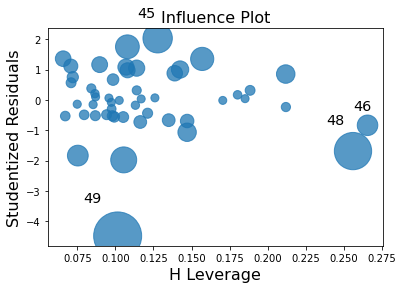

In [128]:
sm.graphics.influence_plot(model)

In [157]:
df1= df.drop(df.index[[45,48,49]],axis=0)

In [160]:
y=df1[['Profit']]
x=df1[['RnD','Marketing','Administration','State_Florida','State_New York']]

In [164]:
import statsmodels.api as sm
x_sm=sm.add_constant(x)
model1=sm.OLS(y,x_sm).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     223.0
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           1.35e-28
Time:                        22:53:18   Log-Likelihood:                -481.36
No. Observations:                  47   AIC:                             974.7
Df Residuals:                      41   BIC:                             985.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.812e+04   5935.013      9.793      0.000    4.61e+04    7.01e+04
RnD                0.7961      0.036     21.942      0.000       0.723       0.869
Marketing          0.0213      0.014      1.553      0.128      -0.006       0.049
Administration    -0.0612      0.044     -1.404      0.168      -0.149       0.027
State_Florida  -1428.9576   2629.921     -0.543      0.590   -6740.191    3882.276
State_New York -1812.3029   2659.035     -0.682      0.499   -7182.333    3557.727
==============================================================================
Omnibus:                        0.059   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.971   Jarque-Bera (JB):                0.230
Skew:                           0.060   Prob(JB):                        0.891
Kurtosis:                       2.679   Cond. No.                     1.61e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [165]:
y_pred=model.predict()

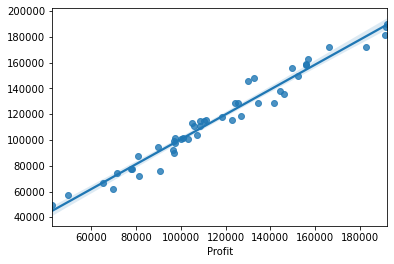

In [166]:
sns.regplot(y,y_pred)

In [229]:
df2=df1.copy()

x1=np.log10(df2[['Administration']])
x2=df2[['RnD','Marketing','State_Florida','State_New York']]
frames=[x1,x2]
x=pd.concat(frames,axis=1)
y=np.sqrt(df2[['Profit']])

In [230]:
x_sm=sm.add_constant(x)
model2=sm.OLS(y,x_sm).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     175.9
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           1.43e-26
Time:                        23:49:50   Log-Likelihood:                -180.64
No. Observations:                  47   AIC:                             373.3
Df Residuals:                      41   BIC:                             384.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            373.0204     92.310      4.041      0.000     186.597     559.444
Administration   -26.2855     18.206     -1.444      0.156     -63.053      10.482
RnD                0.0012   6.03e-05     19.961      0.000       0.001       0.001
Marketing       1.662e-05   2.26e-05      0.736      0.466    -2.9e-05    6.22e-05
State_Florida     -0.0415      4.383     -0.009      0.992      -8.892       8.810
State_New York    -0.6612      4.425     -0.149      0.882      -9.598       8.276
==============================================================================
Omnibus:                        2.187   Durbin-Watson:                   1.415
Prob(Omnibus):                  0.335   Jarque-Bera (JB):                1.274
Skew:                          -0.332   Prob(JB):                        0.529
Kurtosis:                       3.458   Cond. No.                     1.41e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [228]:
df1

,RnD,Administration,Marketing,State_Florida,State_New York,Profit
0,165349.20,136897.80,471784.10,0,1,192261.83
1,162597.70,151377.59,443898.53,0,0,191792.06
2,153441.51,101145.55,407934.54,1,0,191050.39
3,144372.41,118671.85,383199.62,0,1,182901.99
4,142107.34,91391.77,366168.42,1,0,166187.94
5,131876.90,99814.71,362861.36,0,1,156991.12
6,134615.46,147198.87,127716.82,0,0,156122.51
7,130298.13,145530.06,323876.68,1,0,155752.60
8,120542.52,148718.95,311613.29,0,1,152211.77
9,123334.88,108679.17,304981.62,0,0,149759.96
